In [1]:
from phoenix import potentials, distributionfunctions, sampling, actions_to_phase_space
from phoenix.potentials import miyamoto_nagai_potential as Phi
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:10: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite typechecker: usually one of the two lines below.
from typeguard import typechecked as typechecker
from beartype import beartype as typechecker

@jaxtyped(typechecker=typechecker)
def foo(...):
```
and the old double-decorator syntax
```
@jaxtyped
@typechecker
def foo(...):
```
should no longer be used. (It will continue to work as it did before, but the new approach will produce more readable error messages.)
In particular note that `typechecker` must be passed via keyword argument; the following is not valid:
```
@jaxtyped(typechecker)
def foo(...):
```

  @jaxtyped
/Users/annalena/Documents/GitHub/phoenix/phoenix/distributionfunctions.py:38: UserWarning: As of jaxtyping version 0.2.24, jaxtyping now prefers the syntax
```
from jaxtyping import jaxtyped
# Use your favourite ty

In [2]:
#define parameters
params = {
    "R0": 8.0, # for actions to phase space
    "Rinit": 8.0, # for sampling
    "R0_thin": 5.0,
    "Rd_thin": 2.5,
    "Sigma0_thin": 100.0,
    "RsigR_thin": 8.0,
    "RsigZ_thin": 8.0,
    "sigmaR0_R0_thin": 40.0,
    "sigmaz0_R0_thin": 25.0,
    "L0_thin": 50.0,
    "Rinit_for_Rc_thin": 8.0,
    "R0_thick": 8.0,
    "Rd_thick": 2.0,
    "Sigma0_thick": 150.0,
    "RsigR_thick": 8.0,
    "RsigZ_thick": 4.0,
    "sigmaR0_R0_thick": 60.0,
    "sigmaz0_R0_thick": 40.0,
    "L0_thick": 50.0,
    "Rinit_for_Rc_thick": 8.0,
    "f_thin": 0.8,
    "f_thick": 0.2,
}

envelope_max = 3.0
n_candidates = 500_000
key = jax.random.PRNGKey(42)

#theta = (1e12, 20.0, 20.0)  # (M, a, b) z.B. für Miyamoto–Nagai
#theta_target = (1e12, 5.0, 2.0)  # (M, a, b) z.B. für Miyamoto–Nagai
theta = jnp.array([1e12, 20.0, 20.0])
theta_target = jnp.array([1e12, 5.0, 2.0])

In [3]:
#from parameters to phase space coordinates
@jax.jit
def params_to_phasespace(params, theta = theta, Phi= Phi, key=key, n_candidates=n_candidates, envelope_max=envelope_max):
    candidates, samples, soft_weights = sampling.sample_df_potential(key, params, Phi, theta, n_candidates, envelope_max, tau=0.01)
    phase_space_coords = actions_to_phase_space.map_actions_to_phase_space(samples, params, key, Phi, theta)
    return phase_space_coords

In [4]:
dparams_to_phasespace = jax.jacfwd(lambda p: params_to_phasespace(p), argnums=0)(params)

In [5]:
dtheta_to_phasespace = jax.jacfwd(lambda t: params_to_phasespace(params, theta=t), argnums=0)(theta)

In [6]:
print(dparams_to_phasespace)

{'L0_thick': Array([[-0., -0., -0.,  0.,  0., -0.],
       [-0.,  0., -0.,  0., -0.,  0.],
       [ 0.,  0., -0., -0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0.,  0.,  0., -0.],
       [-0., -0.,  0.,  0., -0., -0.],
       [ 0., -0., -0.,  0.,  0.,  0.]], dtype=float32), 'L0_thin': Array([[-0., -0., -0.,  0.,  0., -0.],
       [-0.,  0., -0.,  0., -0.,  0.],
       [ 0.,  0., -0., -0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0.,  0.,  0., -0.],
       [-0., -0.,  0.,  0., -0., -0.],
       [ 0., -0., -0.,  0.,  0.,  0.]], dtype=float32), 'R0': Array([[-0.0000000e+00, -0.0000000e+00, -0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, -0.0000000e+00],
       [-0.0000000e+00,  0.0000000e+00, -0.0000000e+00,  0.0000000e+00,
        -0.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  0.0000000e+00, -0.0000000e+00, -0.0000000e+00,
         0.0000000e+00,  0.0000000e+00],
       ...,
       [ 1.2216938e-13,  2.9911303e-13,  2.6206491e-19, -1.9521369e-09,
         7.9731760e-1

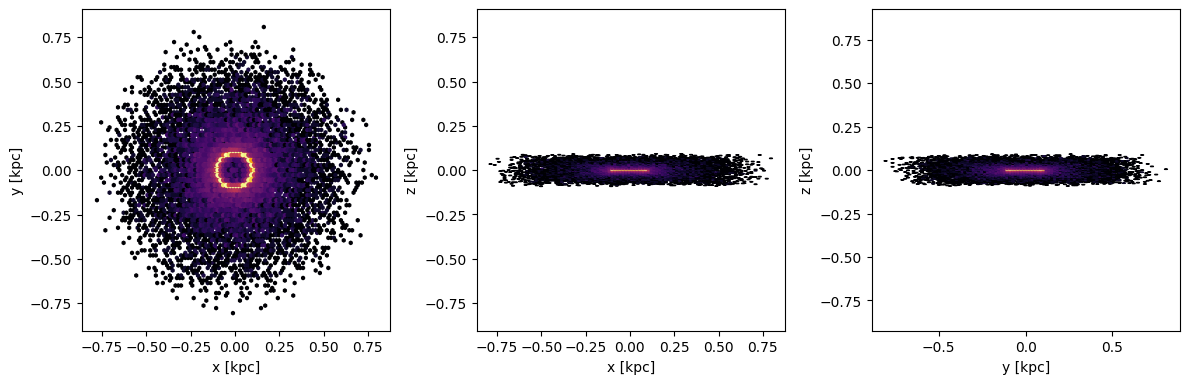

In [7]:
phase_space_coords = params_to_phasespace(params)

x = phase_space_coords[:, 0]
y = phase_space_coords[:, 1]
z = phase_space_coords[:, 2]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hexbin(x, y, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.subplot(132)
plt.hexbin(x, z, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.subplot(133)
plt.hexbin(y, z, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [8]:
target_phase_space_coords = params_to_phasespace(params, theta=theta_target)

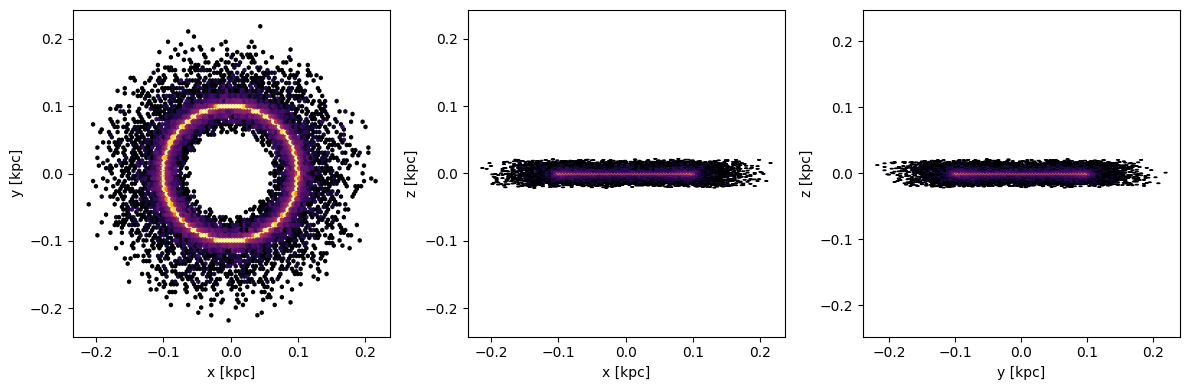

In [9]:
x_target = target_phase_space_coords[:, 0]
y_target = target_phase_space_coords[:, 1]
z_target = target_phase_space_coords[:, 2]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(131)
plt.hexbin(x_target, y_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.axis('equal')
plt.subplot(132)
plt.hexbin(x_target, z_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.subplot(133)
plt.hexbin(y_target, z_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [17]:
@jax.jit
def loss_function(params, theta_init, theta_target):
    #theta_source = jnp.array([theta[0], theta[1], theta[2]])
    theta = jnp.array([theta_init[0]*1e12, theta_init[1]*100, theta_init[2]*100])
    source_phase_space = params_to_phasespace(params, theta)
    target_phase_space = params_to_phasespace(params, theta_target)
    loss = jnp.mean((source_phase_space - target_phase_space)**2) / len(source_phase_space)
    return loss

In [18]:
theta_init = jnp.array([1, 0.2, 0.2])
loss = loss_function(params, theta_init, theta_target)
print("Initial loss:", loss)

Initial loss: 8.660813


In [20]:
@jax.jit
def compute_loss_and_grads(params, theta, theta_target):
    #theta_init = jnp.array([M, a, b])
    #theta_init = {'M': M, 'a': a, 'b': b}
    #theta = {'M': theta[0], 'a': theta[1], 'b': theta[2]}
    return jax.value_and_grad(lambda t: loss_function(params, theta, theta_target))(theta)

In [21]:
loss, grads = compute_loss_and_grads(params, theta, theta_target)
grads = jax.tree_util.tree_map(lambda g: jnp.clip(g, -1e3, 1e3), grads)
print("Loss:", loss)
print("Gradients:", grads)

Loss: 50693.496
Gradients: [0. 0. 0.]


In [28]:
import jax
import jax.numpy as jnp

# 1. Enable x64 for stability
#jax.config.update("jax_enable_x64", True)

# ... define params_to_phasespace ...

def loss_function(params, theta_array, theta_target):
    # theta_array is [M, a, b]
    theta = jnp.array([theta_array[0]*1e12, theta_array[1]*100, theta_array[2]*100])
    theta_target = jnp.array([theta_target[0]*1e12, theta_target[1]*100, theta_target[2]*100])
    source_phase_space = params_to_phasespace(params, theta)
    target_phase_space = params_to_phasespace(params, theta_target)
    loss = jnp.sum((source_phase_space - target_phase_space)**2) / len(source_phase_space)
    return loss

# Setup data
# M is 1e12. Ensure we are in float64 mode or rescale M.
theta_init = jnp.array([1, 0.2, 0.2], dtype=jnp.float64)
theta_target = jnp.array([1, 0.25,0.17], dtype=jnp.float64) # Example target

# 2. Use value_and_grad with argnums
# argnums=1 means "differentiate with respect to the 2nd argument (theta_array)"
grad_fn = jax.value_and_grad(loss_function, argnums=1)

loss, grads = grad_fn(params, theta_init, theta_target)

# 3. Handle Gradients (Clipping)
# Note: Gradients for M might still be tiny or huge compared to a and b
grads = jnp.clip(grads, -1e3, 1e3)

print("Loss:", loss)
print("Gradients:", grads)

Loss: 911.5814555565729
Gradients: [ 1000. -1000. -1000.]


In [29]:
import optax

def adam_optimizer(loss_function, params, theta_init, theta_target, learning_rate=1e-3, tol=1e-6, max_iter=10):
    #theta_init = jnp.array([M, a, b])
    #theta = theta_init
    #optimizers = {'M': optax.adam(learning_rate), 'a': optax.adam(learning_rate), 'b': optax.adam(learning_rate)}
    #theta_labels = {'M': 'M', 'a': 'a', 'b': 'b'}
    #theta_init = {"M": M, "a": a, "b": b}
    #theta_target = {"M": theta_target[0], "a": theta_target[1], "b": theta_target[2]}

    #optimiter = optax.multi_transform(optimizers, theta_labels)
    #optimizer_state = optimiter.init(theta_init)
    optimizer = optax.adam(learning_rate)
    optimizer_state = optimizer.init(theta_init)

    theta = theta_init

    theta_history = []
    loss_history = []

    for i in range(max_iter):
        #loss, grads = jax.value_and_grad(lambda t: loss_function(params, t['M'], t['a'], t['b'], theta_target))(theta_init)
        #loss, grads = compute_loss_and_grads(params, theta_init['M'], theta_init['a'], theta_init['b'], theta_target=theta_target)
        #loss, grads = compute_loss_and_grads(params, theta, theta_target)
        #grads = jax.tree_util.tree_map(lambda g: jnp.clip(g, -1e3, 1e3), grads)
        grad_fn = jax.value_and_grad(loss_function, argnums=1)

        loss, grads = grad_fn(params, theta, theta_target)
        grads = jnp.clip(grads, -1e3, 1e3)

        loss_history.append(loss)
        theta_history.append(theta)
        print("Gradients:", grads)
        print("Loss:", loss)
        updates, optimizer_state = optimizer.update(grads, optimizer_state)
        print("Updates:", updates)
        theta = optax.apply_updates(theta, updates)
        print(f"Iteration {i}: Loss = {loss}, Theta = {theta}")

        if optax.global_norm(updates) < tol:
            print(f"Converged at iteration {i}")
            break
    
    return theta_init, loss, theta_history, loss_history

In [27]:
#theta_init = {'M': 1e12, 'a': 20.0, 'b': 20.0}
#theta_init = jnp.array([1e12, 20.0, 20.0])
#theta_target = jnp.array([1e12, 25.0, 17.0])
theta_init = jnp.array([1, 0.2, 0.2])
theta_target = jnp.array([1, 0.25,0.17])
theta_optimized, final_loss, theta_history, loss_history = adam_optimizer(loss_function, params, theta_init, theta_target)

Gradients: [ 0.01289558 -0.07445351 -0.07393921]
Loss: 0.0007135090261237759
Updates: [-0.001  0.001  0.001]
Iteration 0: Loss = 0.0007135090261237759, Theta = [0.999 0.201 0.201]
Gradients: [-3.28438671e+02 -6.51838883e-02 -6.46508634e-02]
Loss: 0.16471988971440596
Updates: [0.00074411 0.00099435 0.00099428]
Iteration 1: Loss = 0.16471988971440596, Theta = [0.99974411 0.20199435 0.20199428]
Gradients: [-8.39801409e+01 -5.74811398e-02 -5.69419739e-02]
Loss: 0.011192198594387578
Updates: [0.00071558 0.00098556 0.00098537]
Iteration 2: Loss = 0.011192198594387578, Theta = [1.00045969 0.20297991 0.20297965]
Gradients: [ 1.50568732e+02 -5.00678482e-02 -4.95244986e-02]
Loss: 0.034971505282435
Updates: [0.00029953 0.00097264 0.00097227]
Iteration 3: Loss = 0.034971505282435, Theta = [1.00075922 0.20395255 0.20395192]
Gradients: [ 2.48463005e+02 -4.26917864e-02 -4.21409403e-02]
Loss: 0.09464606726567916
Updates: [-9.35860865e-05  9.54444204e-04  9.53801845e-04]
Iteration 4: Loss = 0.094646067

In [30]:
print(theta_history)

[Array([1. , 0.2, 0.2], dtype=float64), Array([0.999, 0.201, 0.201], dtype=float64), Array([0.99974411, 0.20199435, 0.20199428], dtype=float64), Array([1.00045969, 0.20297991, 0.20297965], dtype=float64), Array([1.00075922, 0.20395255, 0.20395192], dtype=float64), Array([1.00066564, 0.204907  , 0.20490572], dtype=float64), Array([1.00036392, 0.20583693, 0.20583461], dtype=float64), Array([0.99998936, 0.20673523, 0.20673128], dtype=float64), Array([0.99966257, 0.20759423, 0.20758789], dtype=float64), Array([0.99948282, 0.20840604, 0.20839635], dtype=float64)]


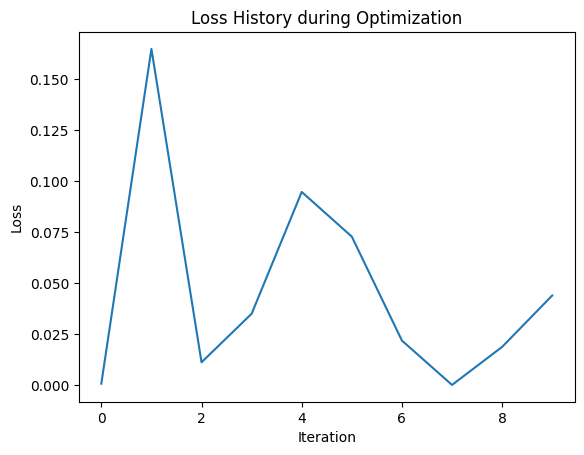

In [31]:
plt.figure()
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss History during Optimization')
plt.show()

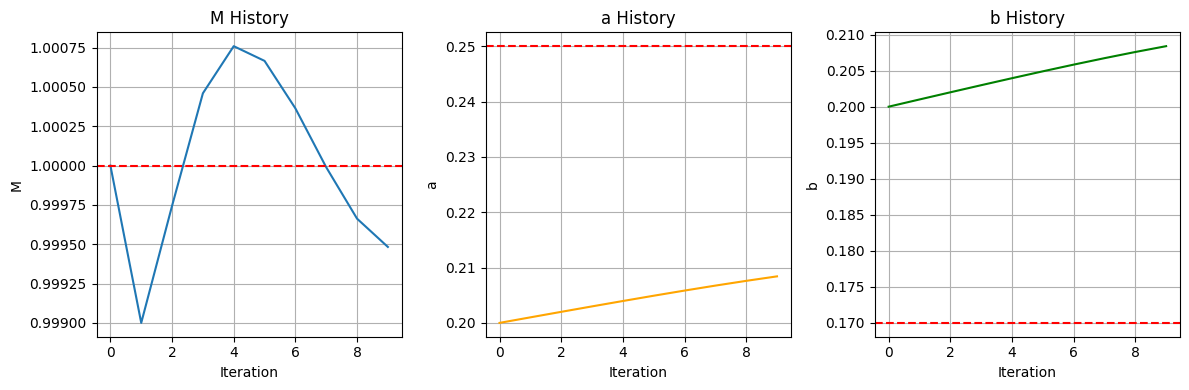

In [33]:
import matplotlib.pyplot as plt

# Extract M, a, and b from theta_history
M_history = [float(theta[0]) for theta in theta_history]
a_history = [float(theta[1]) for theta in theta_history]
b_history = [float(theta[2]) for theta in theta_history]

# Create subplots
plt.figure(figsize=(12, 4))

# Plot M
plt.subplot(1, 3, 1)
plt.plot(M_history, label='M')
plt.xlabel('Iteration')
plt.ylabel('M')
plt.title('M History')
plt.axhline(y=theta_target[0], color='red', linestyle='--', label='Target M')
plt.grid()

# Plot a
plt.subplot(1, 3, 2)
plt.plot(a_history, label='a', color='orange')
plt.xlabel('Iteration')
plt.ylabel('a')
plt.title('a History')
plt.axhline(y=theta_target[1], color='red', linestyle='--', label='Target a')
plt.grid()

# Plot b
plt.subplot(1, 3, 3)
plt.plot(b_history, label='b', color='green')
plt.xlabel('Iteration')
plt.ylabel('b')
plt.title('b History')
plt.axhline(y=theta_target[2], color='red', linestyle='--', label='Target b')
plt.grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


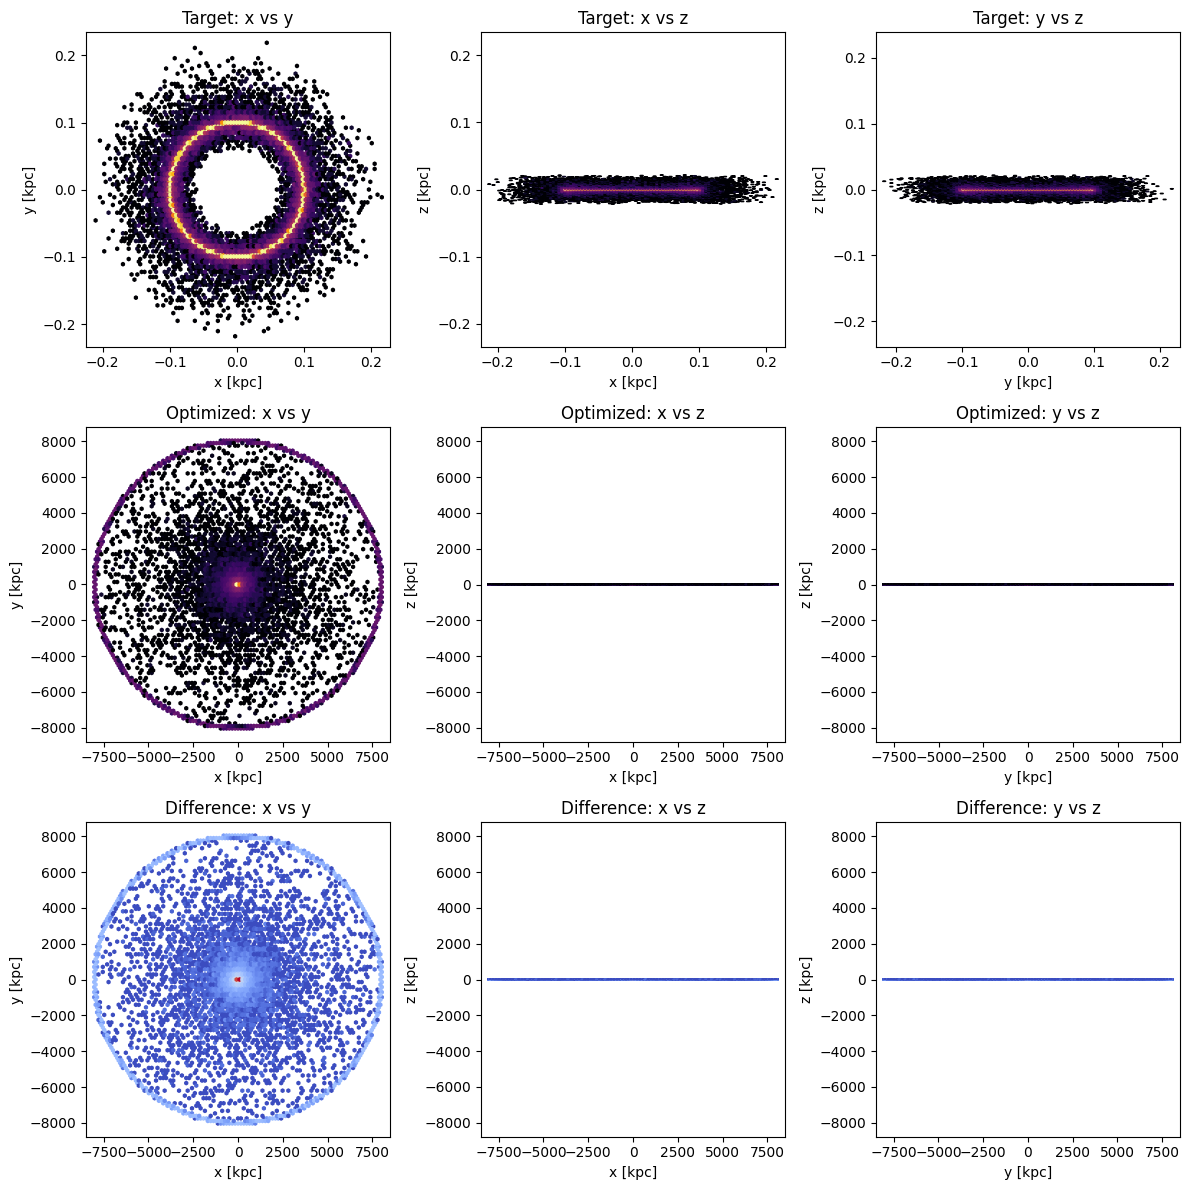

In [34]:
# Extract target phase space coordinates
x_target = target_phase_space_coords[:, 0]
y_target = target_phase_space_coords[:, 1]
z_target = target_phase_space_coords[:, 2]

# Extract optimized phase space coordinates
optimized_phase_space_coords = params_to_phasespace(params, theta=theta_optimized)
x_optimized = optimized_phase_space_coords[:, 0]
y_optimized = optimized_phase_space_coords[:, 1]
z_optimized = optimized_phase_space_coords[:, 2]

# Compute differences
x_diff = x_target - x_optimized
y_diff = y_target - y_optimized
z_diff = z_target - z_optimized

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# First row: Target
plt.subplot(3, 3, 1)
plt.hexbin(x_target, y_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Target: x vs y')
plt.axis('equal')

plt.subplot(3, 3, 2)
plt.hexbin(x_target, z_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.title('Target: x vs z')
plt.axis('equal')

plt.subplot(3, 3, 3)
plt.hexbin(y_target, z_target, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.title('Target: y vs z')
plt.axis('equal')

# Second row: Optimized
plt.subplot(3, 3, 4)
plt.hexbin(x_optimized, y_optimized, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Optimized: x vs y')
plt.axis('equal')

plt.subplot(3, 3, 5)
plt.hexbin(x_optimized, z_optimized, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.title('Optimized: x vs z')
plt.axis('equal')

plt.subplot(3, 3, 6)
plt.hexbin(y_optimized, z_optimized, gridsize=100, cmap='inferno', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.title('Optimized: y vs z')
plt.axis('equal')

# Third row: Difference
plt.subplot(3, 3, 7)
plt.hexbin(x_diff, y_diff, gridsize=100, cmap='coolwarm', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('y [kpc]')
plt.title('Difference: x vs y')
plt.axis('equal')

plt.subplot(3, 3, 8)
plt.hexbin(x_diff, z_diff, gridsize=100, cmap='coolwarm', bins='log')
plt.xlabel('x [kpc]')
plt.ylabel('z [kpc]')
plt.title('Difference: x vs z')
plt.axis('equal')

plt.subplot(3, 3, 9)
plt.hexbin(y_diff, z_diff, gridsize=100, cmap='coolwarm', bins='log')
plt.xlabel('y [kpc]')
plt.ylabel('z [kpc]')
plt.title('Difference: y vs z')
plt.axis('equal')

plt.tight_layout()
plt.show()